<a href="https://colab.research.google.com/github/Maratinhos/hw/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import pandas as pd
%matplotlib inline

In [67]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!ls

kaggle.json  sample_data


In [0]:
!mkdir ~/.kaggle

In [0]:
!mv kaggle.json ~/.kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.26MB/s]


In [0]:
df = pd.read_csv('train.csv')

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df[['Survived', 'Pclass', 'Age', 'Fare']].groupby(['Survived']).mean()

,Pclass,Age,Fare
Survived,,,
0,2.531876,30.626179,22.117887
1,1.950292,28.343690,48.395408


In [0]:
df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
0,0.188908
1,0.742038


In [0]:
df['Sex'] = df['Sex'].replace('male', 0)
df['Sex'] = df['Sex'].replace('female', 1)

In [0]:
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [0]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df['Pclass'].describe()

count    891.000000
mean       0.769547
std        0.278690
min        0.333333
25%        0.666667
50%        1.000000
75%        1.000000
max        1.000000
Name: Pclass, dtype: float64

In [0]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1, shuffle=True)

In [0]:
(x_train.shape, y_train.shape)

((801, 6), (90,))

In [0]:
(x_val.shape, y_val.shape)

((90, 6), (90,))

In [0]:
x_train[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare
19,3,1,NaN,0,0,7.225
157,3,0,30.0,0,0,8.050
481,2,0,NaN,0,0,0.000
714,2,0,52.0,0,0,13.000
70,2,0,32.0,0,0,10.500


In [0]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_test)

In [0]:
x_train_scaled = x_train_scaled.astype(np.float32)
x_val_scaled = x_val_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

In [0]:
x_train_scaled = np.array(x_train_scaled)
x_val_scaled = np.array(x_val_scaled)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [84]:
x_train_scaled[:5]

array([[-0.36913726, -0.7391428 , -0.10071471, -0.47140703,  0.76027244,
         0.0076846 ],
       [ 0.8328096 , -0.7391428 , -2.0163367 , -0.47140703,  0.76027244,
        -0.47654793],
       [ 0.8328096 , -0.7391428 , -0.72582704, -0.47140703, -0.4850818 ,
        -0.49368957],
       [ 0.8328096 , -0.7391428 , -0.58691317, -0.47140703, -0.4850818 ,
        -0.49080592],
       [ 0.8328096 , -0.7391428 , -1.4203963 ,  3.1162133 ,  2.0056267 ,
        -0.02420754]], dtype=float32)

In [85]:
(x_train_scaled.shape, y_train.shape)

((801, 6), (801,))

In [86]:
(x_val_scaled.shape, y_val.shape)

((90, 6), (90,))

In [79]:
y_train.head()

848    0.0
803    1.0
715    0.0
391    1.0
182    0.0
Name: Survived, dtype: float32

In [80]:
y_val.describe()

count    90.000000
mean      0.411111
std       0.494792
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64

In [0]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [115]:
history = model.fit(x_train_scaled, y_train, validation_data = (x_val_scaled, y_val), epochs = 30)

Train on 801 samples, validate on 90 samples
Epoch 1/30
801/801 [==============================] - 0s 353us/sample - loss: 0.6844 - acc: 0.6142 - val_loss: 0.6818 - val_acc: 0.5889
Epoch 2/30
801/801 [==============================] - 0s 112us/sample - loss: 0.6713 - acc: 0.6192 - val_loss: 0.6773 - val_acc: 0.5889
Epoch 3/30
801/801 [==============================] - 0s 106us/sample - loss: 0.6661 - acc: 0.6192 - val_loss: 0.6790 - val_acc: 0.5889
Epoch 4/30
801/801 [==============================] - 0s 100us/sample - loss: 0.6647 - acc: 0.6192 - val_loss: 0.6792 - val_acc: 0.5889
Epoch 5/30
801/801 [==============================] - 0s 113us/sample - loss: 0.6650 - acc: 0.6192 - val_loss: 0.6788 - val_acc: 0.5889
Epoch 6/30
801/801 [==============================] - 0s 92us/sample - loss: 0.6651 - acc: 0.6192 - val_loss: 0.6800 - val_acc: 0.5889
Epoch 7/30
801/801 [==============================] - 0s 90us/sample - loss: 0.6654 - acc: 0.6192 - val_loss: 0.6798 - val_acc: 0.5889
Epoch

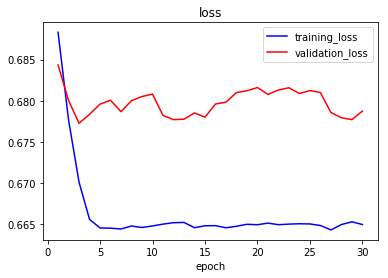

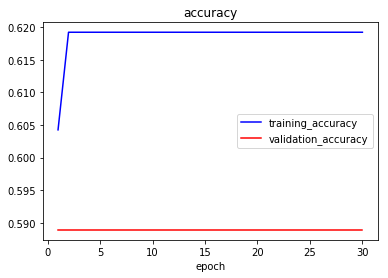

In [113]:
# Training plots
epochs = [i for i in range(1, len(history.history['loss'])+1)]

plt.plot(epochs, history.history['loss'], color='blue', label="training_loss")
plt.plot(epochs, history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(epochs, history.history['acc'], color='blue', label="training_accuracy")
plt.plot(epochs, history.history['val_acc'], color='red',label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()